# **Substitutiva 1° Semestre - 2023**

## **Objetivo**
Avaliar os conceitos de IA adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma grande rede de lojas de vestuário que está desenvolvendo uma nova ferramenta para controle de estoque. Eles querem que você crie um modelo de rede neural convolucional capaz de classificar imagens das peças de roupas e classifica-las de forma correta para facilitar o controle de estoque.

Sua tarefa é criar um modelo de CNN que possa classificar as imagens do FASHION MNIST com o máximo de precisão que conseguir. A empresa recomenda usar como framework de aprendizado profundo o TensorFlow e Keras.

Para facilitar o seu trabalho, a empresa disponibilizou um roteiro que deve ser seguido para que o seu projeto esteja dentro dos padrões seguidos pelo time de desenvolvimento.

Ao final do projeto, você deve enviar seu modelo treinado e documentado através de comentários no código. A empresa irá avaliar seu trabalho com base na precisão do modelo e na qualidade dos comentários apresentados. Boa sorte!

## **Avaliação**
Cada item do roteiro tem seu próprio peso indicado no próprio item.

São 8 questões, cada uma com seu próprio peso.

A soma dos pesos totaliza 10 pontos.

### **Roteiro de Desenvolvimento**

1 - Carregue as bibliotécas e dependências do seu projeto e possíveis constantes de configuração, como quantidade de épocas. (1,0 ponto)

In [26]:
# Importar as bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Definir as configurações do modelo
batch_size = 128
num_classes = 10
epochs = 5

2 - Carregue o conjunto de dados FASHION_MNIST que é disponibilizado pelo Keras e faça a separação dos dados entre treino e teste. (1,0 ponto)

In [21]:
# Carrega o dataset
mnist = keras.datasets.fashion_mnist

# Carrega os dados de treino e teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

3 - Pré-processamento de dados: (1,0 ponto)

> Verifique as caracteristicas das imagens do dataset. Faça o redimensionamento das imagens caso necessário.

> Normalize as imagens para que os valores dos pixels fiquem entre 0 e 1.

In [10]:
# Mostra as caracteristicas do dataset
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


0


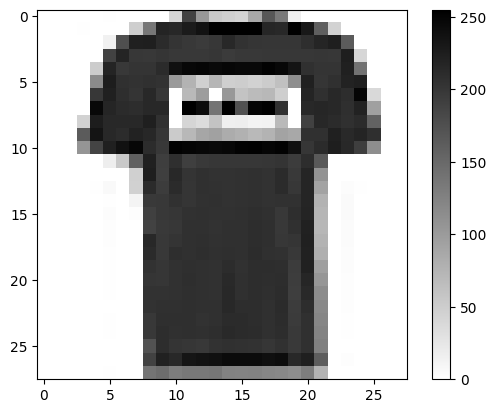

In [11]:
# Exibe uma amostra do dataset
plt.figure()
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()
print(train_labels[1])

0


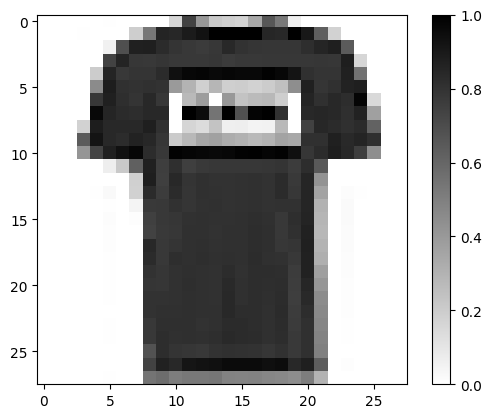

In [12]:
# Normalizando a escala de cinza para ficar entre 0 e 1
train_images = train_images/255
test_images = test_images/255
plt.figure()
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()
print(train_labels[1])

4 - Mostra os primeiros 10 (dez) itens do dataset, já normalizado. (1,0 ponto)

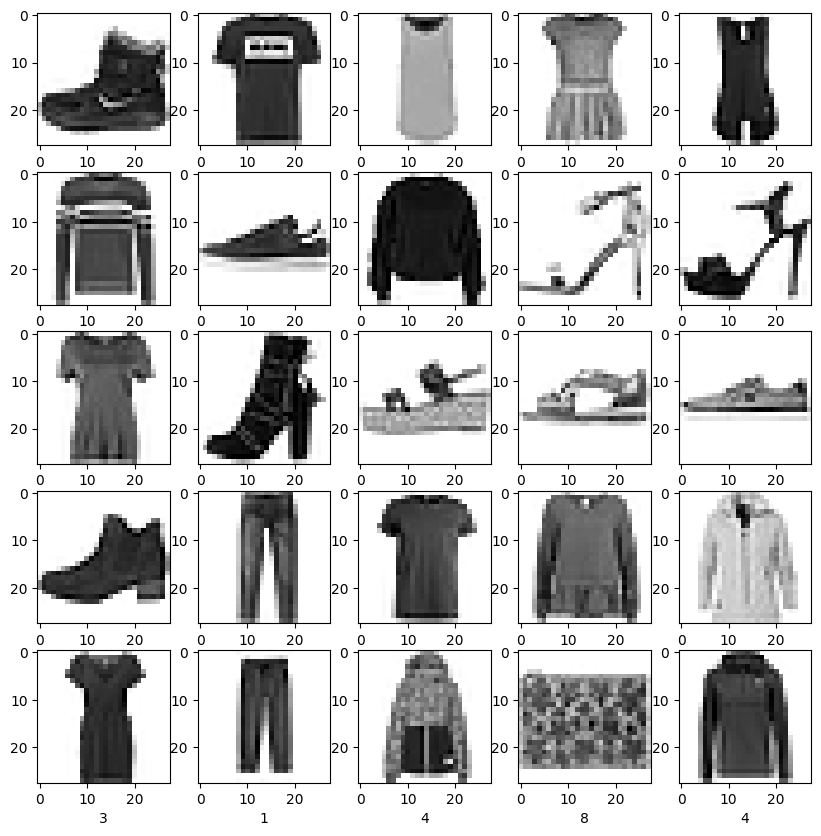

In [13]:
# Mostrando o dataset normalizado
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap = 'binary')
  plt.xlabel(train_labels[i])

5 - Crie uma arquitetura de CNN: (2,0 pontos)

> Defina o número de camadas convolucionais e totalmente conectadas.

> Defina a função de ativação para cada camada.

> Adicione camadas de regularização, como dropout ou batch normalization.

In [22]:
# Criando um modelo de rede neural sequencial.
model2 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU 
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model2.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', 
                                activation ='relu', input_shape=(28,28,1)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade 
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels. 
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número 
# de parâmetros e a extrair as características mais importantes da imagem.
model2.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Adiciona uma camada de convolução 2D com 64 filtros de tamanho 5x5, que usa a função de ativação ReLU 
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model2.add( keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', 
                                activation ='relu', input_shape=(28,28,1)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade 
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels. 
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número 
# de parâmetros e a extrair as características mais importantes da imagem
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Transforma a imagem no formato de "matriz" em um vetor
model2.add(keras.layers.Flatten())

# Adiciona uma camada de 1024 neuronios totalmente conectados (Densa) com função de ativação ReLU
model2.add(keras.layers.Dense(1024, activation='relu'))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula 
# as probabilidades de cada classe usando a função softmax.
model2.add(keras.layers.Dense(10, activation='softmax'))

6 - Compile o modelo: (1,0 ponto)

> Defina a função de perda;

> Escolha um otimizador;

> Escolha uma métrica de avaliação;

In [24]:
# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa 
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)             

7 - Treine o modelo: (1,0 ponto)

> Ajuste os hiperparâmetros, como a taxa de aprendizado e o tamanho do lote.

> Use o conjunto de treinamento para treinar o modelo.

> Determine o tamanho do conjunto de validação para avaliar o desempenho do modelo durante o treinamento.

> Ajuste o modelo conforme necessário com base na performance no conjunto de validação.

In [30]:
# Treina o modelo
history = model2.fit(train_images, train_labels,  batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 3s 7ms/step - loss: 0.1586 - accuracy: 0.9398 - val_loss: 0.3165 - val_accuracy: 0.8958
Epoch 2/5
422/422 [==============================] - 3s 7ms/step - loss: 0.1391 - accuracy: 0.9471 - val_loss: 0.3446 - val_accuracy: 0.8943
Epoch 3/5
422/422 [==============================] - 3s 6ms/step - loss: 0.1323 - accuracy: 0.9503 - val_loss: 0.3542 - val_accuracy: 0.8962
Epoch 4/5
422/422 [==============================] - 3s 6ms/step - loss: 0.1210 - accuracy: 0.9544 - val_loss: 0.3805 - val_accuracy: 0.8928
Epoch 5/5
422/422 [==============================] - 3s 6ms/step - loss: 0.1153 - accuracy: 0.9567 - val_loss: 0.3978 - val_accuracy: 0.8965


8 - Avalie o modelo usando o conjunto de testes e justifique o porquê desse resultado. (2,0 pontos)

In [31]:
# Vamos testar o modelo!
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4397 - accuracy: 0.8977
0.4396857023239136
0.8977000117301941
